# Comparing noise from data vs stochastic simulations: Cell 5 from Kylie

All the data files are in my OneDrive at: /OneDrive .../Postdoc/cardiacNoiseData, but I'll add some of the data here in folder Some_Kilies_data/
There is a readme.txt file explaining what is in each file, including the names of the protocols and a dictionary of cell's names.  Protocols 3-5 are big files to have in github. Protocl 7 is the sine wave data, and protocol 6 is the action potential data. I'll start with one of the smaller data sets.

The protocols that I have the myokit version are 2, 3, 4, 5

To do:
- Get the data of cell 5 for protocols 2-5 -> DONE
- simulate ode versions of protocols 2-5 -> DONE
- plot V- data vs V- myokit to check they match -> DONE
- compare ode version I vs cell 5 data -> DONE, they don't match that well
- simulate stochastic version of each model (N=10,000 or N=50,000)
- Compare by eye
- Compare with "residuals" 



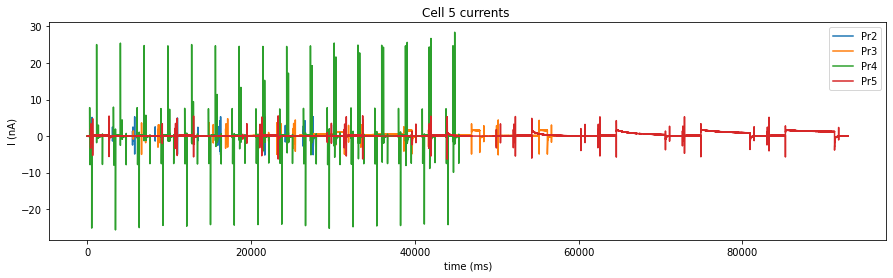

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import myokit
import myokit.lib.markov
from scipy.interpolate import interp1d


# Import the data
pr2_time, pr2_voltage, pr2_current = np.loadtxt('Some_Kylies_data/KyliePR2cell123456910.txt', delimiter=',',skiprows=1, usecols=(0,1,6), unpack=True)

pr3_time, pr3_voltage, pr3_current = np.loadtxt('/Users/pmzah/OneDrive - The University of Nottingham/Postdoc/cardiacNoiseData/KyliePR3cellall.txt', delimiter=',',skiprows=1, usecols=(0,1,6), unpack=True)

pr4_time, pr4_voltage, pr4_current = np.loadtxt('/Users/pmzah/OneDrive - The University of Nottingham/Postdoc/cardiacNoiseData/cardiac_noise/KylieData/KyliePR4cellall.txt', delimiter=',',skiprows=1, usecols=(0,1,6), unpack=True)

pr5_time, pr5_voltage, pr5_current = np.loadtxt('/Users/pmzah/OneDrive - The University of Nottingham/Postdoc/cardiacNoiseData/KyliePR5cellall.txt', delimiter=',',skiprows=1, usecols=(0,1,6), unpack=True)

plt.figure(figsize=(15,4))
plt.title('Cell 5 currents ')
plt.plot(pr2_time, pr2_current, label='Pr2')
plt.plot(pr3_time, pr3_current, label='Pr3')
plt.plot(pr4_time, pr4_current, label='Pr4')
plt.plot(pr5_time, pr5_current, label='Pr5')
plt.xlabel('time (ms)')
plt.ylabel('I (nA)')
plt.legend()


plt.show()


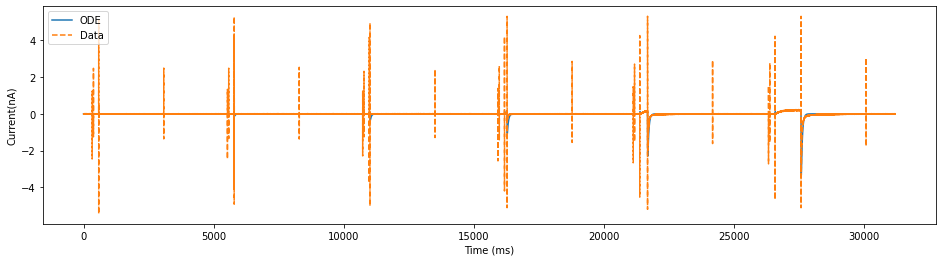

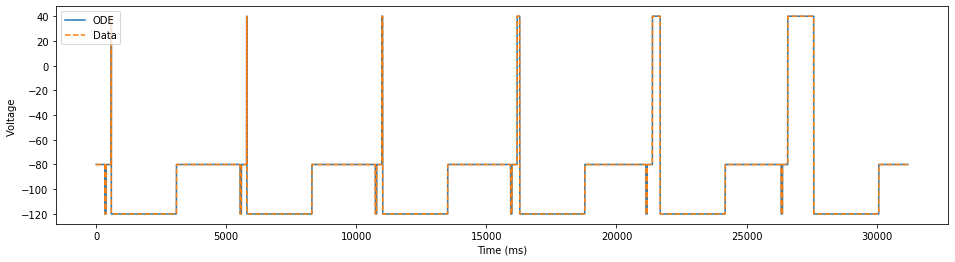

In [39]:
# Simulate the models for each protocol

# Load model
model = myokit.load_model('resources/beattie-2017-ikr-markov.mmt')
# Load a protocols
protocol_2 = myokit.load_protocol('resources/pr2-activation-kinetics-2.mmt')
protocol_3 = myokit.load_protocol('resources/pr3-steady-activation.mmt')
protocol_4 = myokit.load_protocol('resources/pr4-inactivation.mmt')
protocol_5 = myokit.load_protocol('resources/pr5-deactivation.mmt')
# Create a parametrisable Hodgkin-Huxley model
parameters = [
    'ikr.p1', 
    'ikr.p2', 
    'ikr.p3', 
    'ikr.p4', 
    'ikr.p5', 
    'ikr.p6', 
    'ikr.p7', 
    'ikr.p8', 
    'ikr.p9',
]
markov_model = myokit.lib.markov.LinearModel.from_component(model.get('ikr'), parameters=parameters)

# Create an analytical simulation for each protocol
markov_sim_pr2 = myokit.lib.markov.AnalyticalSimulation(markov_model, protocol_2)
markov_sim_pr3 = myokit.lib.markov.AnalyticalSimulation(markov_model, protocol_3)
markov_sim_pr4 = myokit.lib.markov.AnalyticalSimulation(markov_model, protocol_4)
markov_sim_pr5 = myokit.lib.markov.AnalyticalSimulation(markov_model, protocol_5)

# Log times will be equal to the times from the data
hh_log_pr2 = markov_sim_pr2.run(pr2_time[-1] + 0.1, log_times=pr2_time)
hh_log_pr3 = markov_sim_pr3.run(pr3_time[-1] + 0.1, log_times=pr3_time)
hh_log_pr4 = markov_sim_pr4.run(pr4_time[-1] + 0.1, log_times=pr4_time)
hh_log_pr5 = markov_sim_pr5.run(pr5_time[-1] + 0.1, log_times=pr5_time)


plt.figure(figsize=(16, 4))
plt.xlabel('Time (ms)')
plt.ylabel('Current(nA)')
plt.plot(pr2_time, hh_log_pr2['ikr.IKr'], '-', label='ODE')
plt.plot(pr2_time, pr2_current, '--', label='Data')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(16, 4))
plt.xlabel('Time (ms)')
plt.ylabel('Voltage ')
plt.plot(pr2_time, hh_log_pr2['membrane.V'], '-', label='ODE')
plt.plot(pr2_time, pr2_voltage, '--', label='Data')
plt.legend(loc='upper left')
plt.show()


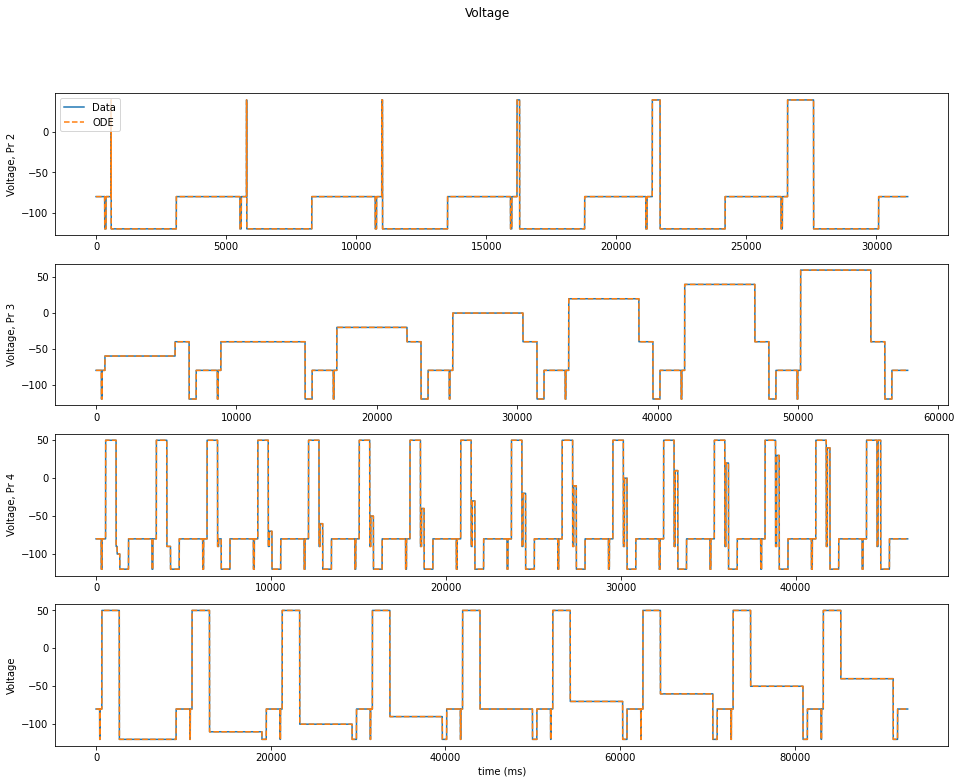

In [46]:
# Plot data vs ODE solutions
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16,12))
fig.suptitle('Voltage')
ax1.plot(pr2_time, pr2_voltage, '-', label='Data')
ax1.plot(pr2_time, hh_log_pr2['membrane.V'], '--', label='ODE')
ax1.legend(loc='upper left')
ax1.set_ylabel('Voltage, Pr 2')
ax2.plot(pr3_time, pr3_voltage, '-', label='Data')
ax2.plot(pr3_time, hh_log_pr3['membrane.V'], '--', label='ODE')
ax2.set_ylabel('Voltage, Pr 3')
ax3.plot(pr4_time, pr4_voltage, '-', label='Data')
ax3.plot(pr4_time, hh_log_pr4['membrane.V'], '--', label='ODE')
ax3.set_ylabel('Voltage, Pr 4')
ax4.plot(pr5_time, pr5_voltage, '-', label='Data')
ax4.plot(pr5_time, hh_log_pr5['membrane.V'], '--', label='ODE')
ax4.set_ylabel('Voltage')
ax4.set_xlabel('time (ms)')


plt.show()

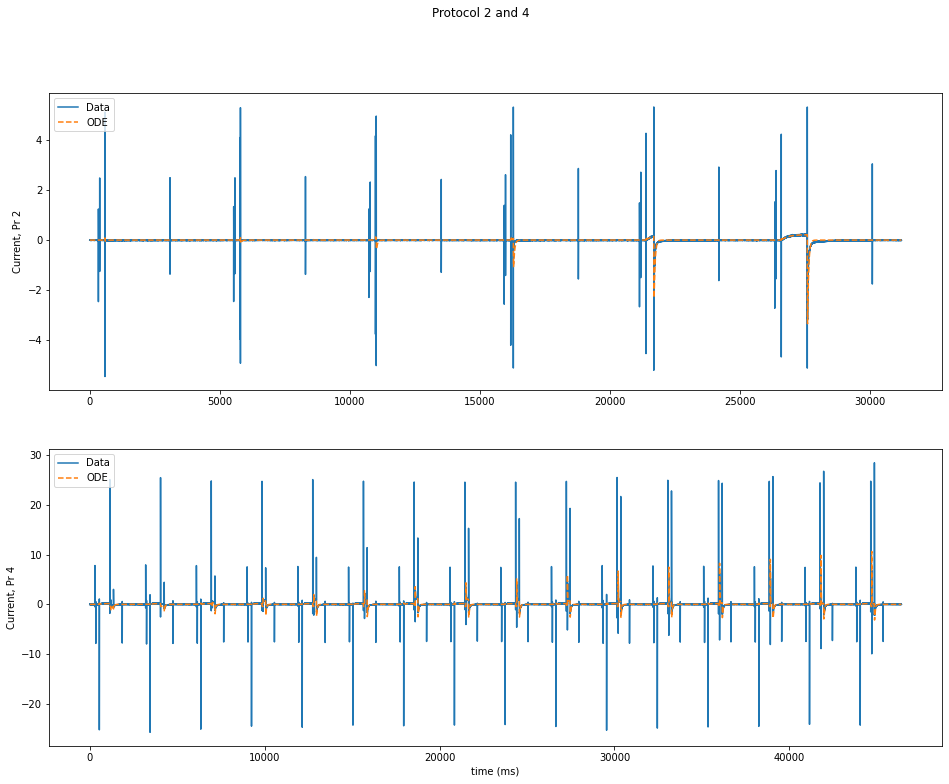

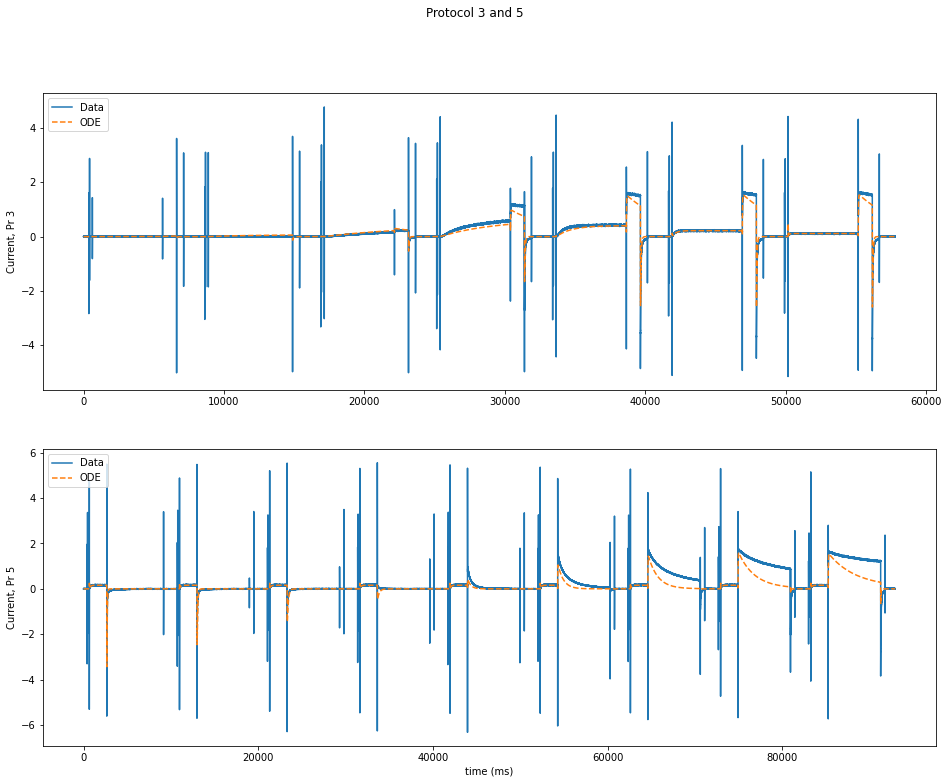

In [49]:
# Plot data vs ODE solutions
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))
fig.suptitle('Protocol 2 and 4')
ax1.plot(pr2_time, pr2_current, '-', label='Data')
ax1.plot(pr2_time, hh_log_pr2['ikr.IKr'], '--', label='ODE')
ax1.legend(loc='upper left')
ax1.set_ylabel('Current, Pr 2')
ax2.plot(pr4_time, pr4_current, '-', label='Data')
ax2.plot(pr4_time, hh_log_pr4['ikr.IKr'], '--', label='ODE')
ax2.set_xlabel('time (ms)')
ax2.set_ylabel('Current, Pr 4')
ax2.legend(loc='upper left')

plt.show()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))
fig.suptitle('Protocol 3 and 5')
ax1.plot(pr3_time, pr3_current, '-', label='Data')
ax1.plot(pr3_time, hh_log_pr3['ikr.IKr'], '--', label='ODE')
ax1.legend(loc='upper left')
ax1.set_ylabel('Current, Pr 3')
ax2.plot(pr5_time, pr5_current, '-', label='Data')
ax2.plot(pr5_time, hh_log_pr5['ikr.IKr'], '--', label='ODE')
ax2.set_xlabel('time (ms)')
ax2.set_ylabel('Current, Pr 5')
ax2.legend(loc='upper left')

plt.show()

In [50]:
# Pameters
N = 10000
seed_m = 1
O_grid_pr2= np.zeros([1,len(pr2_time)])
O_grid_pr3= np.zeros([1,len(pr3_time)])
O_grid_pr4= np.zeros([1,len(pr4_time)])
O_grid_pr5= np.zeros([1,len(pr5_time)])

# define the models
sim_pr2 = myokit.lib.markov.DiscreteSimulation(markov_model, protocol_2, nchannels = N)
sim_pr3 = myokit.lib.markov.DiscreteSimulation(markov_model, protocol_3, nchannels = N)
sim_pr4 = myokit.lib.markov.DiscreteSimulation(markov_model, protocol_4, nchannels = N)
sim_pr5 = myokit.lib.markov.DiscreteSimulation(markov_model, protocol_5, nchannels = N)



# Simulate PR 2
np.random.seed(seed_m)
log_pr2 = sim_pr2.run(pr2_time[-1] + 0.1)
O_pr2 = np.array(log_pr2['ikr.y3']) 
I_pr2 = np.array(log_pr2['ikr.IKr'])
time_full_pr2 = np.array(log_pr2['engine.time'])
O_inter = interp1d(time_full_pr2, O_pr2,'previous', fill_value = "extrapolate")
O_grid_pr2[0,:] = O_inter(pr2_time)


print('hola')

hola


In [54]:
# Let's compare the simulation vs data 1. Protocol 2:

# Plot  binned means for the different N's
plt.figure(figsize=(14, 5))
plt.plot(time_full_pr2, I_pr2,'.', drawstyle='steps-post', label='Synth')
plt.plot(pr2_time, pr2_current,'.', drawstyle='steps-post', label='Data')
plt.plot(pr2_time, hh_log_pr2['ikr.IKr'],'--', drawstyle='steps-post', label='ODE')
plt.xlabel('time (ms)')
plt.ylabel('mean O/N')
plt.title('Current protocol 2')
plt.legend()

plt.show()

In [51]:

# Simulate PR 3
print('Simulating Pr3')
np.random.seed(seed_m)
log_pr3 = sim_pr3.run(pr3_time[-1] + 0.1)
O_pr3 = np.array(log_pr3['ikr.y3']) 
I_pr3 = np.array(log_pr3['ikr.IKr'])
time_full_pr3 = np.array(log_pr3['engine.time'])
O_inter = interp1d(time_full_pr3, O_pr3,'previous', fill_value = "extrapolate")
O_grid_pr3[0,:] = O_inter(pr3_time)

print('Pr3 done')




Simulating Pr3
Pr3 done


In [52]:
print('Simulating Pr5')
np.random.seed(seed_m)
log_pr5 = sim_pr5.run(pr5_time[-1] + 0.1)
O_pr5 = np.array(log_pr5['ikr.y3']) 
I_pr5 = np.array(log_pr5['ikr.IKr'])
time_full_pr5 = np.array(log_pr5['engine.time'])
O_inter = interp1d(time_full_pr5, O_pr5,'previous', fill_value = "extrapolate")
O_grid_pr5[0,:] = O_inter(pr5_time)

print('Pr5 done')

Simulating Pr5
Pr5 done


In [53]:
print('Simulating Pr4')
np.random.seed(seed_m)
log_pr4 = sim_pr4.run(pr4_time[-1] + 0.1)
O_pr4 = np.array(log_pr4['ikr.y3']) 
I_pr4 = np.array(log_pr4['ikr.IKr'])
time_full_pr4 = np.array(log_pr4['engine.time'])
O_inter = interp1d(time_full_pr4, O_pr4,'previous', fill_value = "extrapolate")
O_grid_pr4[0,:] = O_inter(pr4_time)

print('Pr4 done')

Simulating Pr4
Pr4 done
